# type of missing value.


In [484]:
# creating random 2 dimensional data set. 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


np.random.seed(123)

n_features = 10
n_miss = 3
var_noise = 1
w1 = 5
w0 = 10


# this x and y are complete data set.
x = np.random.rand(n_features)
y = w1 * x + w0 + np.random.normal(0,var_noise, n_features)
y_hat = w1*x + w0


def get_argmax(num,n):
    temp = list(enumerate(num))
    temp = sorted(temp,key = lambda x: x[1],reverse = True)
    ret = [x for x,y in temp]
    #print(temp)
    #print(ret[0:n])
    return ret[0:n]


def all(x,y,w1,w0):
    poly(w1,w0)
    print("")
    stats(x,y)

def poly(w1,w0):
    print(f"slope is {w1}")
    print(f"intercept is {w0}")

def stats(x,y):
    print(f"mean of x {np.mean(x)}")
    print(f"standard deviation of x {np.sqrt(np.var(x))}")
    print(f"mean of y {np.mean(y)}")
    print(f"standard deviation of y {np.sqrt(np.var(y))}")
    

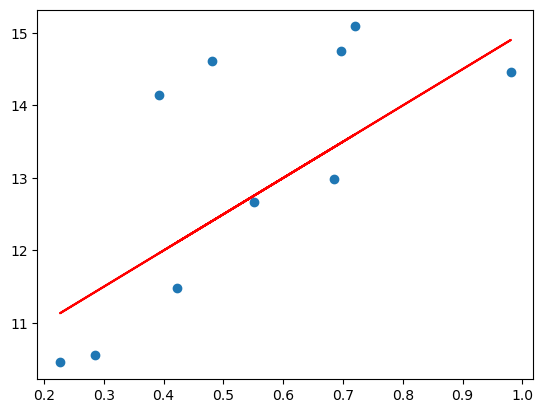

In [485]:
plt.scatter(x,y)
plt.plot(x,y_hat,color = "red")

In [486]:
stats(x,y)

mean of x 0.544199352975335
standard deviation of x 0.21758256938579879
mean of y 13.120243895052255
standard deviation of y 1.6781195261976183


## missing completely at random

missing value does not depends on ovserved data or missing data.

In [488]:
# missing randomly three data from x and y
idx_mcar = np.random.choice(range(0,n_features),size = n_miss,replace = False)
y_mcar = np.delete(y,idx_mcar) 
x_mcar = np.delete(x,idx_mcar)
w1_mcar, w0_mcar = np.polyfit(x_mcar,y_mcar,1)

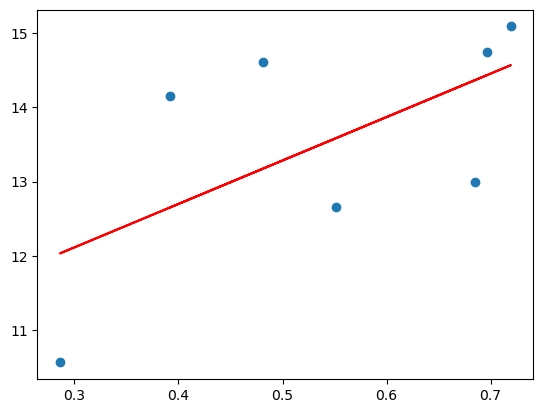

In [489]:
plt.scatter(x_mcar,y_mcar)
plt.plot(x_mcar,x_mcar*w1_mcar+w0_mcar,color = "red")

In [490]:
poly(w1_mcar, w0_mcar)

slope is 5.850339933501493
intercept is 10.359052160834626


In [491]:
stats(x_mcar,y_mcar)

mean of x 0.5444673453828671
standard deviation of x 0.15466978653102315
mean of y 13.544371214015555
standard deviation of y 1.478615948744639


when missing value is MCAR. 
you can do regression in the same way as the case when the data is complete. 

## missing at random

missing value depends on observed data but not on missing data in itself.

In [494]:
# in this example missing value depends on the size of x. (data that has value 3 from top) 

idx_mar = get_argmax(x,n_miss)
x_mar = np.delete(x,idx_mar)
y_mar = np.delete(y,idx_mar)
w1_mar, w0_mar = np.polyfit(x_mar, y_mar,1)

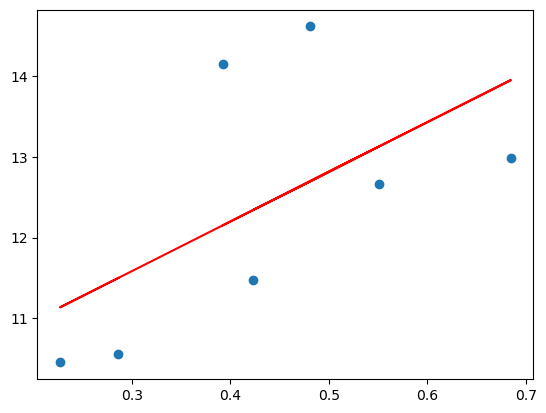

In [495]:
plt.scatter(x_mar,y_mar)
plt.plot(x_mar, w1_mar*x_mar+w0_mar,color = "red")

In [496]:
poly(w1_mar,w0_mar)


slope is 6.1399131382982235
intercept is 9.74396570787467


In [497]:
stats(x_mar,y_mar)

mean of x 0.43504159656932995
standard deviation of x 0.14418214163698087
mean of y 12.415083322356937
standard deviation of y 1.5287769357416974


missing value where x has large value, so large y is also deleted, which causes the mean,std of y to get smaller

# missing not at random

missing value depends on the missing data.

In [500]:
# in this example missing value depends on the size of x. (data that has value 3 from top) 
idx_mnar = get_argmax(y,n_miss)
x_mnar = np.delete(x,idx_mnar)
y_mnar = np.delete(y,idx_mnar)
w1_mnar, w0_mnar = np.polyfit(x_mnar, y_mnar,1)

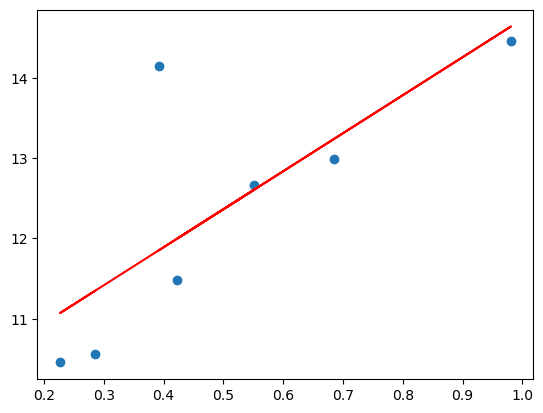

In [501]:
plt.scatter(x_mnar,y_mnar)
plt.plot(x_mnar, w1_mnar*x_mnar+w0_mnar,color = "red")

In [502]:
all(x_mnar, y_mnar,w1_mnar,w0_mnar)

slope is 4.732887609051945
intercept is 9.996594534464148

mean of x 0.5064462104122234
standard deviation of x 0.24069433362363082
mean of y 12.393547528375475
standard deviation of y 1.49845844802382


the decrease of mean,std of y is bigger than the MAR because missing value depends on y in itself.

# How to Diagnose the missing data mechanism.

## MAR ( missing at random ) vs MNAR ( missing not at random ) 

1. futher survey needed
2.  from domain knowledge.

there seems not specific way for diagnosing the MAR vs MNAR
you might wanna experience and execute try and error. 

## MCAR ( missing completely at random ) vs MAR ( missing at random ) 
1. little's test
2. Create the dummy variable (missing = 1, observed = 0 ) and then do t-test or chi square test ( anova ) 

# which method is good for each type of missing value.


## MCAR 

check the size of missing value.
threshhold is 5-10% of rows you can delete.

if more than 10%, you might wanna imputation. 

## MAR 


CC and basic impuation (mean/median/mode) is likely to cause biases

regression imputaiton is likely to cause biases on std/correlation

multiple imputation is most appropriate.

## MNAR 

you have to think about the reason behind the missing 
